<a href="https://colab.research.google.com/github/raufdevo/CNN_Concepts-Challenges/blob/main/CNN_Concepts_Challenges.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#By Rauf Ismayilzada

# "Convolutional Operations and Neural Network Training: Exploring Concepts and Challenges"



The following project is divided in two parts:

- Part A: Please, run the pre-coded cells to see and understand how Convolution 2D kernel works and, at the end, respond to the questions 01 and 02
- Part B: Please, run the pre-coded cells to train the given Neural Network and then respond to the questions 03 to 10

The idea of the current assignment is to intensify what we have learned about Convolutional Neural Networks (chapter 5 of the *Deep Learning With Python* book).

There are some new concepts and challenges that we will face in the current assignment, and we need to resolve each issue and move to the next step.



# PART A

## Image Convolution

In [ ]:
# Import the necessary packages and libraries
import numpy as np
from PIL import Image
from scipy import misc
from skimage import data
from skimage.color import rgb2gray
import matplotlib.pyplot as plt
%matplotlib inline
import requests
from io import BytesIO

## Import the image

In [ ]:
# Get the image from the URL
response = requests.get('https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTAHCp2ppBbfcPk9S5nE8gFFsZpDh0Exv9qUKXjehk_QszZHsV_pw&s')

In [ ]:
# Visualize the content of the response
print(response.content)

b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00\x84\x00\t\x06\x07\x12\x13\x12\x15\x13\x13\x12\x16\x16\x15\x15\x17\x17\x16\x15\x17\x18\x17\x17\x17\x17\x17\x17\x15\x15\x16\x17\x15\x17\x15\x19\x19\x1d( \x18\x1b&\x1b\x15\x15!1!%)+...\x17\x1f383-7(-.+\x01\n\n\n\x0e\r\x0e\x1a\x10\x10\x1b-&\x1e%--------------------+--//--------/----------------\xff\xc0\x00\x11\x08\x00\x8c\x01g\x03\x01\x11\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1c\x00\x00\x01\x05\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x02\x03\x04\x05\x06\x01\x07\x08\xff\xc4\x00L\x10\x00\x02\x00\x03\x05\x04\x06\x06\x05\t\x06\x05\x05\x01\x00\x00\x01\x02\x00\x03\x11\x04\x05\x12!1\x06AQq\x07\x13a\x81\x91\xa1"2Br\xb1\xc1#R\xd1\xe1\xf03Cb\x82\x92\xa2\xb2\xc2\xd2\x08\x14DSs\x93\x16\x17ET\xf14c\xa3\xb3\xe2\x15\xff\xc4\x00\x1b\x01\x01\x00\x03\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\x06\x07\xff\xc4\x00<\x11\x00\x02\x01\x02\x02\x06\x06\n\x00\x04\x07\x01\x00\x00\x00\

In [ ]:
# BytesIO() buffers the image into the RAM
# Image.open() opens the buffered image
# np.array() transforms the image into a 3D array containing values from 0-255 corresponding to the RGB colour channels
input_img_arr = np.array(Image.open(BytesIO(response.content)))

## First let’s see the Image.




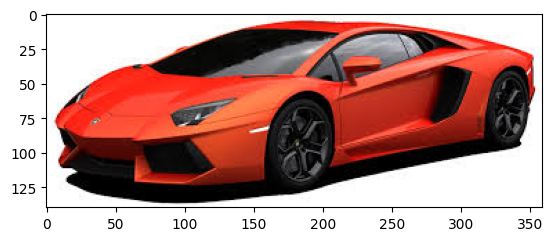

In [ ]:
# Plot the resulting image from the array
plt.imshow(input_img_arr)

In [ ]:
# Print the array shape
print(input_img_arr.shape)

# Compare the values of colour channels 0 and 1
print(np.array_equal(
        input_img_arr[:, :, 0],
        input_img_arr[:, :, 1]))

# Compare the values of colour channels 1 and 2
print(np.array_equal(
        input_img_arr[:, :, 1],
        input_img_arr[:, :, 2]))

(140, 359, 3)
False
False


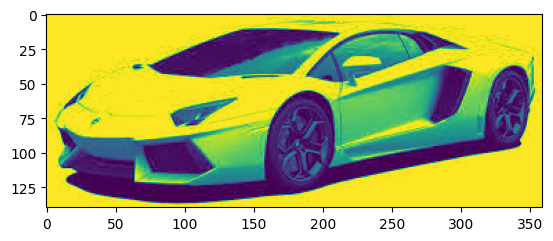

In [ ]:
# Save the colour channel 0 in to the input_img_arr array variable and print it
input_img_arr = input_img_arr[:, :, 0]
plt.imshow(input_img_arr)

In [ ]:
# Visualize the values inside of the resulting array
input_img_arr[:, :]

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

## Convolution with 2-D Kernels

How Convolution works?
https://miro.medium.com/max/790/1*1okwhewf5KCtIPaFib4XaA.gif

In [ ]:
# Create a padded array by adding 2 rows and 2 columns (one of each at the beginning and another of each at the end)
padded_array = np.pad(input_img_arr, (1, 1), 'constant')

# Create the kernel
kernel = np.array([[0, 0, 0],
                   [0, 1, 0],
                   [0, 0, 0]])

#Create an output array filled with zeros with the same shape of input_img_arr
output_array = np.zeros(input_img_arr.shape)

In [ ]:
#Compare both arrays
print("Original array shape:",input_img_arr.shape)
print("Padded array shape:",padded_array.shape)

Original array shape: (140, 359)
Padded array shape: (142, 361)


In [ ]:
#Apply the kernel to the array values
for i in range(padded_array.shape[0]-2):
    for j in range(padded_array.shape[1]-2):
        temp_array = padded_array[i:i+3, j:j+3]
        output_array[i, j] = np.sum(temp_array*kernel)

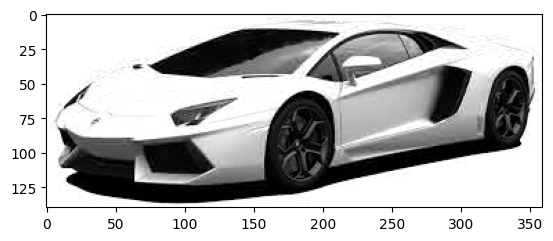

In [ ]:
#Plot the resulting array
plt.imshow(output_array, cmap = plt.get_cmap('gray'))

## Standard Convolution

In [ ]:
# Define a function to squash out the values between 0-255 range.
# This function will be called in the following function since the resulting array values can be negative or greater than 255
def squash_pixel_value(value):
    if value < 0:
        return 0
    elif value < 255:
        return value
    else:
        return 255

In [ ]:
#Define a function to apply a Conv 2D Kernel to an image
def conv_2d_kernel(image_array_2d, kernel, squash_pixels = True):
    padded_array = np.pad(image_array_2d, (1, 1), 'constant')

    kernel_width = kernel.shape[0]
    kernel_height = kernel.shape[1]

    transformed_array = np.zeros(image_array_2d.shape)

    for i in range(padded_array.shape[0] - kernel_width + 1):
        for j in range(padded_array.shape[1] - kernel_height + 1):
            temp_array = padded_array[i:i+kernel_width, j:j+kernel_height]
            if squash_pixels:
                transformed_array[i, j] = squash_pixel_value(np.sum(temp_array*kernel))
            else:
                transformed_array[i, j] = np.sum(temp_array*kernel)
    return transformed_array

## Line detection
With image convolutions, you can easily detect lines. Here are four convolutions to detect horizontal, vertical and lines at 45 degrees:

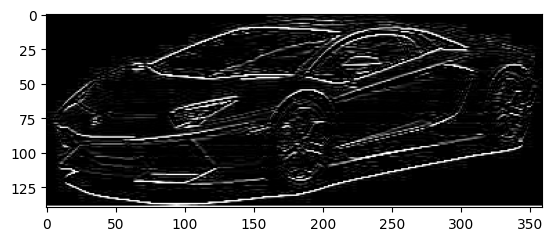

In [ ]:
#Create a kernel to detect horizontal lines
horizontal_kernel = np.array([[-1, -1, -1],
                              [2, 2, 2],
                              [-1, -1, -1]])

#Apply the kernel to the image
transf_horizontal = conv_2d_kernel(input_img_arr, kernel = horizontal_kernel)

#Plot the resulting image
plt.imshow(transf_horizontal, cmap = plt.get_cmap('gray'))

### Questions 01-a and 01-b

#### 01-a: Based on the kernels represented on the above image, create a kernel to detect 45 degree lines using convolution, apply to the car's image and plot the result

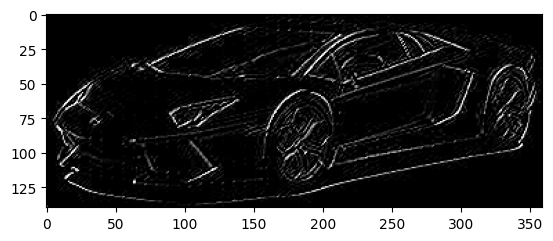

In [ ]:
# Type your code here

kernel_45_degree = np.array([[-1, -1, 2],
                              [-1, 2, -1],
                              [2, -1, -1]])


transf_kernel_45_degree = conv_2d_kernel(input_img_arr, kernel = kernel_45_degree)


plt.imshow(transf_kernel_45_degree, cmap = 'gray')

#### 01-b: Based on the kernels represented on the above image, create a kernel to detect 135 degree lines using convolution, apply to the car's image and plot the result

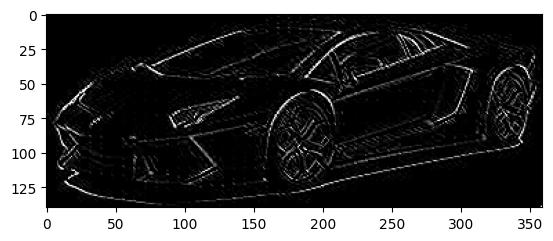

In [ ]:
# Type your code here

kernel_135_degree = np.array([[2, -1, -1],
                              [-1, 2, -1],
                              [-1, -1, 2]])


transf_kernel_135_degree = conv_2d_kernel(input_img_arr, kernel = kernel_135_degree)


plt.imshow(transf_kernel_135_degree, cmap = 'gray')

## Edge Detection

### Question 02: Apply the following kernels to your image and plot the output

#### 02-a:

In [ ]:
edge_kernel_1 = np.array([[1, 0, -1],
                          [0, 0, 0],
                          [-1, 0, 1]])

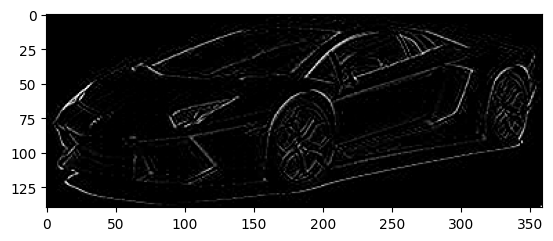

In [ ]:
# Type your code here

transf_kernel_edge_1 = conv_2d_kernel(input_img_arr, kernel = edge_kernel_1)


plt.imshow(transf_kernel_edge_1, cmap = 'gray')

#### 02-b:

In [ ]:
edge_kernel_2 = np.array([[0, 1, 0],
                          [1, -4, 1],
                          [0, 1, 0]])

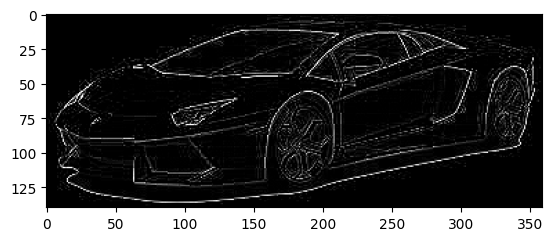

In [ ]:
# Type your code here
transf_kernel_edge_2 = conv_2d_kernel(input_img_arr, kernel = edge_kernel_2)


plt.imshow(transf_kernel_edge_2, cmap = 'gray')

#### 02-c:

In [ ]:
edge_kernel_3 = np.array([[-1, -1, -1],
                          [-1, 8, -1],
                          [-1, -1, -1]])

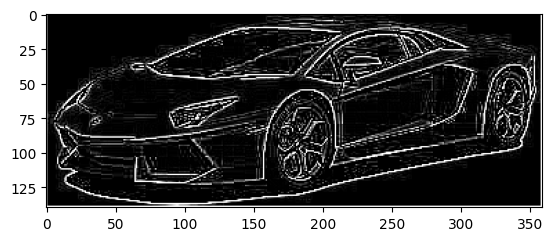

In [ ]:
# Type your code here

transf_kernel_edge_3 = conv_2d_kernel(input_img_arr, kernel = edge_kernel_3)


plt.imshow(transf_kernel_edge_3, cmap = 'gray')

# PART B

## Importing Libraries

In [ ]:
# Import the necessary packages and libraries
import keras
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from keras.constraints import max_norm
from keras.datasets import cifar10

## Preparing the dataset

Read more about cifar10 dataset here
https://www.cs.toronto.edu/~kriz/cifar.html

In [ ]:
#load the dataset
(train_images, train_labels),(test_images, test_labels) = cifar10.load_data()

170498071/170498071 [==============================] - 2s 0us/step


In [ ]:
# one hot encode target values
train_labels = to_categorical(train_labels,10)
test_labels = to_categorical(test_labels,10)

# convert from integers to floats
train_images = train_images.astype('float32')
test_images = test_images.astype('float32')

# normalize to range 0-1
train_images = train_images / 255.0
test_images = test_images / 255.0

## Building the neural network model

In [ ]:
# Create the model
model = keras.Sequential([
          keras.layers.Conv2D(32, (3,3), padding='same',
                              activation='relu',
                              kernel_constraint=max_norm(3),
                              input_shape=(32, 32, 3)),
          keras.layers.MaxPooling2D((2, 2)),
          keras.layers.Flatten(),
          keras.layers.Dense(128, activation='relu'),
          keras.layers.Dense(10, activation='softmax'),
])

In [ ]:
# Model compilation
model.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Display a summary of the model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 128)               1048704   
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 1,050,890
Trainable params: 1,050,890
Non-trainable params: 0
______________________________________________

## CustomCallback class for logging

In [ ]:
# Create a Custom Callback class to be called during the training
class CustomCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(epoch % 5 ==0):
      print(" Finished epoch #",epoch)
      print('Accuracy reached train is',logs.get('accuracy'))
      print('Accuracy reached val is',logs.get('val_accuracy'))
      print()
      return

In [ ]:
# Instantiate the Custom Callback
cc=CustomCallback()

## Training the Nework

In [ ]:
# Train the Network with train_images and train_labels
history = model.fit(train_images,
                    train_labels,
                    epochs=50,
                    batch_size=256,
                    verbose=0,
                    validation_data=(test_images,test_labels),
                    callbacks=[cc])

 Finished epoch # 0
Accuracy reached train is 0.4058400094509125
Accuracy reached val is 0.4997999966144562

 Finished epoch # 5
Accuracy reached train is 0.6479200124740601
Accuracy reached val is 0.6139000058174133

 Finished epoch # 10
Accuracy reached train is 0.7116199731826782
Accuracy reached val is 0.6310999989509583

 Finished epoch # 15
Accuracy reached train is 0.7563199996948242
Accuracy reached val is 0.6513000130653381

 Finished epoch # 20
Accuracy reached train is 0.8018199801445007
Accuracy reached val is 0.6582000255584717

 Finished epoch # 25
Accuracy reached train is 0.8381999731063843
Accuracy reached val is 0.6535999774932861

 Finished epoch # 30
Accuracy reached train is 0.870140016078949
Accuracy reached val is 0.6527000069618225

 Finished epoch # 35
Accuracy reached train is 0.9011200070381165
Accuracy reached val is 0.6495000123977661

 Finished epoch # 40
Accuracy reached train is 0.9244400262832642
Accuracy reached val is 0.6363999843597412

 Finished epo

## Plotting the Results

In [ ]:
# Define a function to plot the results
def result_plotting():
  plt.figure(figsize=[8,6])
  plt.plot(history.history['accuracy'],'blue',linewidth=3.0)
  plt.plot(history.history['val_accuracy'],'red',ls='--',linewidth=3.0)
  plt.legend(['Training Accuracy','Validaion Accuracy'],fontsize=18,loc='lower right')
  plt.xlabel('Epochs',fontsize=16)
  plt.ylabel('Accuracy',fontsize=16)
  plt.title('Accuracy Curves',fontsize=16)

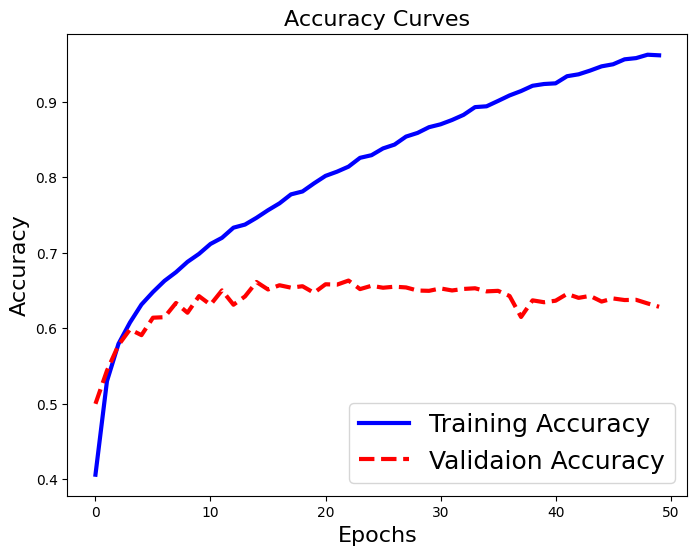

In [ ]:
# Call the result_plotting() function
result_plotting()

### Questions 03 to 10

#### 03: Did the network presented signs of overfitting? If so, in which epoch?

# Answer:
 From Epoch 0->5 T.Acc is behind the V.Acc. From 5->10 T.Acc catched the V.Acc. However after Epoch #20 It strating to have big gap between T.Acc and V.Acc. While T.Acc improves, V.Acc remaining same. As a Result we have a beatiful Overfiting!**bold text**

#### 04: Write down how many layers this model has and identify their types

# Answer:
We have five layers:

1. conv2d (Conv2D) - 2D Convolutional layer
2. max_pooling2d (MaxPooling2D) - Max Pooling layer
3. flatten (Flatten) - Flattening layer
4. dense (Dense) - First Relu dense layer
5. dense (Dense) - Second Softmax dense





#### 05: Briefly explain what is the purpose of each of those layers

# Answer:

1. Conv2D - This layer performs a 2D convolution on the input image to extract features. It applies a set of filters to the input image and generates a set of feature maps that highlight different aspects of the image.

2. MaxPooling2D - A feature map produced by the Conv2D layer is downsampled by this layer in order to reduce the computational complexity and prevent overfitting. Each feature map is compiled using a pooling operation (usually max pooling), which selects the maximum value across all non-overlapping windows.

3. Flatten - In this layer, the 2D feature maps are converted into a 1D vector, which can then be used to train a dense neural network.

4. Dense with Relu - The input vector is transformed linearly into this layer, followed by a non-linear activation function (usually Relu) that introduces non-linearity to the model. This algorithm maps the flattened vector of features to a set of hidden units representing high-level representations of the input image.

5. Dense with Softmax - The final output layer is responsible for producing a probability distribution over the output classes. The input vector is transformed linearly and then activated using a softmax activation function, which ensures that the output scores can be interpreted as probabilities.

#### 06: Add one or more Convolution layers to your model and run it again.

> Hint: Don't modify the given code. Instead, copy and paste the given code below, then:
1. modify it to answer the current question
2.  run the cell below containing the fucntions ```model.compile()``` and ```model.fit()```.
3. once the training is complete, run the following cell containing the ```result_plotting()``` function

In [ ]:
# Type your code here

modelTwo = keras.Sequential([
          keras.layers.Conv2D(32, (3,3), padding='same',
                              activation='relu',
                              kernel_constraint=max_norm(3),
                              input_shape=(32, 32, 3)),
                          keras.layers.Conv2D(64, (3,3), padding='same',
                              activation='relu',
                              kernel_constraint=max_norm(3),
                              input_shape=(32, 32, 3)),
          keras.layers.MaxPooling2D((2, 2)),
          keras.layers.Flatten(),
          keras.layers.Dense(128, activation='relu'),
          keras.layers.Dense(10, activation='softmax'),
])

In [ ]:
# Compile your new model
modelTwo.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['accuracy'])

# Train the Neural Network with your new model
history = modelTwo.fit(train_images,
                    train_labels,
                    epochs=50,
                    batch_size=256,
                    verbose=0,
                    validation_data=(test_images,test_labels),
                    callbacks=[cc])

 Finished epoch # 0
Accuracy reached train is 0.46167999505996704
Accuracy reached val is 0.5540000200271606

 Finished epoch # 5
Accuracy reached train is 0.7740399837493896
Accuracy reached val is 0.698199987411499

 Finished epoch # 10
Accuracy reached train is 0.8986999988555908
Accuracy reached val is 0.6909000277519226

 Finished epoch # 15
Accuracy reached train is 0.9806399941444397
Accuracy reached val is 0.6822999715805054

 Finished epoch # 20
Accuracy reached train is 0.9886000156402588
Accuracy reached val is 0.6700999736785889

 Finished epoch # 25
Accuracy reached train is 0.9922400116920471
Accuracy reached val is 0.675000011920929

 Finished epoch # 30
Accuracy reached train is 0.9913399815559387
Accuracy reached val is 0.6779999732971191

 Finished epoch # 35
Accuracy reached train is 1.0
Accuracy reached val is 0.6901000142097473

 Finished epoch # 40
Accuracy reached train is 1.0
Accuracy reached val is 0.6895999908447266

 Finished epoch # 45
Accuracy reached train

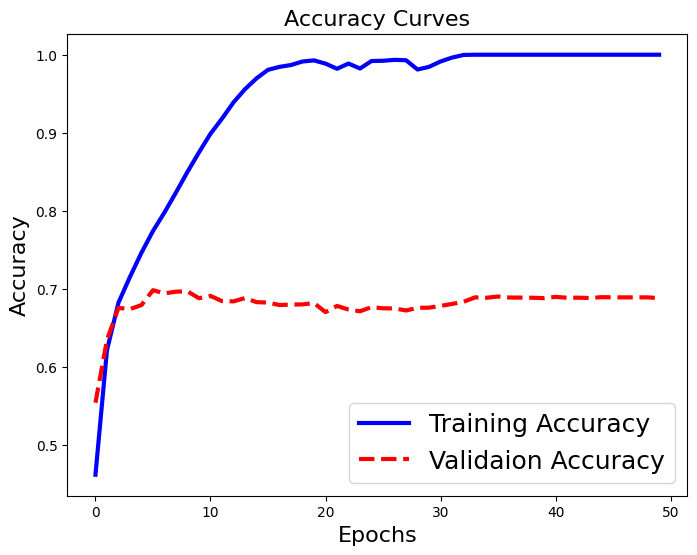

In [ ]:
# Call the result_plotting() to display the results from your code
result_plotting()

#### 07: Compare the results and describe what are the differences between them.

# Answer:

After adding another Conv2D layer, Acc.T reached at max but Acc.V still remaining 68% which is not good. Unfortunately, we still have overfiting!

#### 08: Add a dropout layer to your model, run it, and compare the result with the previous one.

> Hint 1: Here is a good explanation on how dropouts work https://www.youtube.com/watch?v=bRyOi0L6Rs8

> Hint 2: Don't modify the given code. Instead, copy and paste the given code below, then:
1. modify it to answer the current question
2. run the cell below containing the fucntions ```model.compile()``` and ```model.fit()```.
3. once the training is complete, run the following cell containing the ```result_plotting()``` function




In [ ]:
# Type your code here
modelThree = keras.Sequential([
          keras.layers.Conv2D(32, (3,3), padding='same',
                              activation='relu',
                              kernel_constraint=max_norm(3),
                              input_shape=(32, 32, 3)),
                          keras.layers.Conv2D(64, (3,3), padding='same',
                              activation='relu',
                              kernel_constraint=max_norm(3),
                              input_shape=(32, 32, 3)),
          keras.layers.MaxPooling2D((2, 2)),
          keras.layers.Flatten(),
          keras.layers.Dropout(0.6),
          keras.layers.Dense(128, activation='relu'),
          keras.layers.Dense(10, activation='softmax'),
])

In [ ]:
# Compile your new model
modelThree.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['accuracy'])

# Train the Neural Network with your new model
history = modelThree.fit(train_images,
                    train_labels,
                    epochs=50,
                    batch_size=256,
                    verbose=0,
                    validation_data=(test_images,test_labels),
                    callbacks=[cc])

 Finished epoch # 0
Accuracy reached train is 0.44510000944137573
Accuracy reached val is 0.5546000003814697

 Finished epoch # 5
Accuracy reached train is 0.7031000256538391
Accuracy reached val is 0.6858000159263611

 Finished epoch # 10
Accuracy reached train is 0.7713599801063538
Accuracy reached val is 0.7142000198364258

 Finished epoch # 15
Accuracy reached train is 0.8235800266265869
Accuracy reached val is 0.7184000015258789

 Finished epoch # 20
Accuracy reached train is 0.8643199801445007
Accuracy reached val is 0.7254999876022339

 Finished epoch # 25
Accuracy reached train is 0.890999972820282
Accuracy reached val is 0.7281000018119812

 Finished epoch # 30
Accuracy reached train is 0.9117400050163269
Accuracy reached val is 0.7240999937057495

 Finished epoch # 35
Accuracy reached train is 0.9280800223350525
Accuracy reached val is 0.7271999716758728

 Finished epoch # 40
Accuracy reached train is 0.9394400119781494
Accuracy reached val is 0.727400004863739

 Finished epo

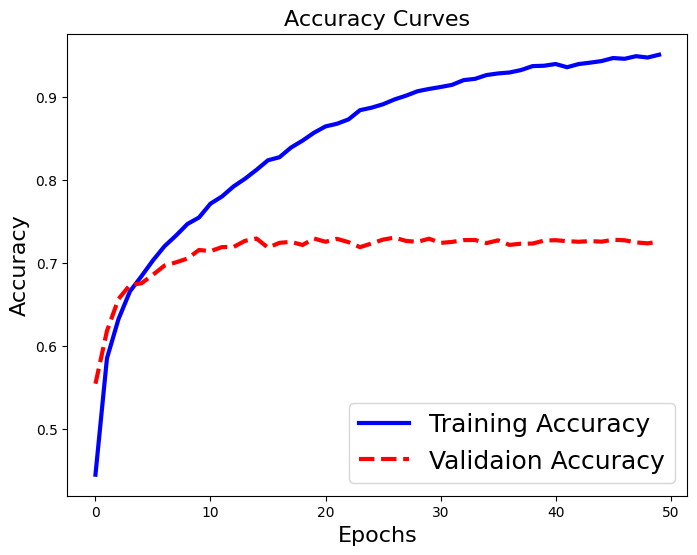

In [ ]:
# Call the result_plotting() to display the results from your code
result_plotting()

#### 09: Explain with your own words what is the purpose of a dropout layer and how it works.

# Answer:
A dropout layer is used to reduce overfitting in models. Randomly selected neurons are ignored during training by the dropout strategy. In order to minimize the chances of overfitting, the model will drop a random number of neurons each time it is used since the input training data will continually change.

#### 10: Make any other modification in the hyperparameters to improve the model's accuracy and compare the final result with the previous one.
> Hint: Don't modify the given code. Instead, copy and paste the given code below, then:
1. modify it to answer the current question
2. run the cell below containing the fucntions ```model.compile()``` and ```model.fit()```.
3. once the training is complete, run the following cell containing the ```result_plotting()``` function

In [ ]:
# Type your answer here
modelFinal = keras.Sequential([
          keras.layers.Conv2D(32, (3,3), padding='same',
                              activation='relu',
                              kernel_constraint=max_norm(3),
                              input_shape=(32, 32, 3)),
          keras.layers.MaxPooling2D((2, 2)),
          keras.layers.Conv2D(64, (3,3), padding='same',
                              activation='relu',
                              kernel_constraint=max_norm(3),
                              input_shape=(32, 32, 3)),
          keras.layers.MaxPooling2D((2, 2)),
          keras.layers.Conv2D(128, (3,3), padding='same',
                              activation='relu',
                              kernel_constraint=max_norm(3),
                              input_shape=(32, 32, 3)),
          keras.layers.MaxPooling2D((2, 2)),
          keras.layers.Flatten(),
          keras.layers.Dropout(0.4),
          keras.layers.Dense(128, activation='relu'),
          keras.layers.Dense(10, activation='softmax'),
])

In [ ]:
# Compile your new model
modelFinal.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['accuracy'])

# Train the Neural Network with your new model
history = modelFinal.fit(train_images,
                    train_labels,
                    epochs=50,
                    batch_size=256,
                    verbose=0,
                    validation_data=(test_images,test_labels),
                    callbacks=[cc])

 Finished epoch # 0
Accuracy reached train is 0.3950600028038025
Accuracy reached val is 0.5241000056266785

 Finished epoch # 5
Accuracy reached train is 0.6956999897956848
Accuracy reached val is 0.7009000182151794

 Finished epoch # 10
Accuracy reached train is 0.7641199827194214
Accuracy reached val is 0.7549999952316284

 Finished epoch # 15
Accuracy reached train is 0.8069999814033508
Accuracy reached val is 0.7703999876976013

 Finished epoch # 20
Accuracy reached train is 0.8397799730300903
Accuracy reached val is 0.7777000069618225

 Finished epoch # 25
Accuracy reached train is 0.8659800291061401
Accuracy reached val is 0.7858999967575073

 Finished epoch # 30
Accuracy reached train is 0.8881400227546692
Accuracy reached val is 0.7890999913215637

 Finished epoch # 35
Accuracy reached train is 0.902999997138977
Accuracy reached val is 0.7914999723434448

 Finished epoch # 40
Accuracy reached train is 0.9161800146102905
Accuracy reached val is 0.7919999957084656

 Finished epo

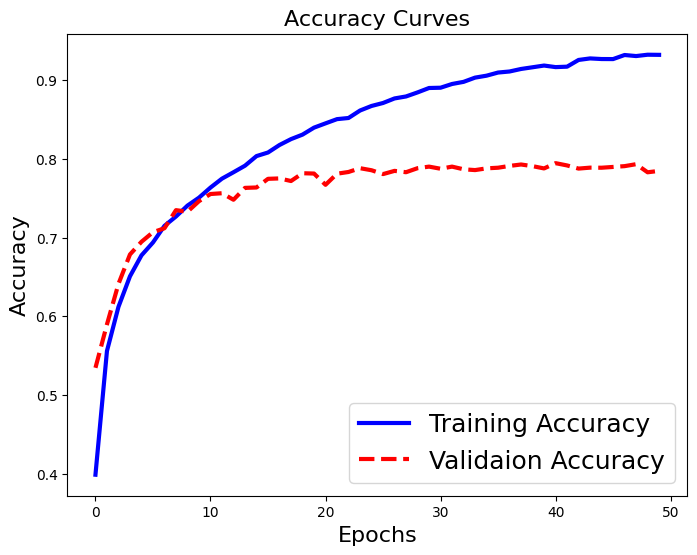

In [ ]:
# Call the result_plotting() to display the results from your code
result_plotting()

All my best,

Rauf
